In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

## Data Extraction

In [22]:
glob.glob(r"C:\Users\hp\Desktop\portfolio projects\individual_stocks_5yr\*csv")

['C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\ADSK

In [6]:
company_list = ['C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAPL_data.csv',
                'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AMZN_data.csv',
               'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\GOOGL_data.csv',
                'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\MSFT_data.csv']

In [7]:
all_data = pd.DataFrame()
 
for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([current_df , all_data] , ignore_index=True)

In [8]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


#  what is the change of the stock prices over time?

In [9]:
# Data sanity checks

In [10]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [11]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [12]:
# Always convert date column to datetime datatype

In [13]:
all_data['date']=pd.to_datetime(all_data['date'])

In [14]:
all_data['date'].head()

0   2013-02-08
1   2013-02-11
2   2013-02-12
3   2013-02-13
4   2013-02-14
Name: date, dtype: datetime64[ns]

In [15]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [16]:
tech_list = all_data['Name'].unique()

In [17]:
tech_list

array(['MSFT', 'GOOGL', 'AMZN', 'AAPL'], dtype=object)

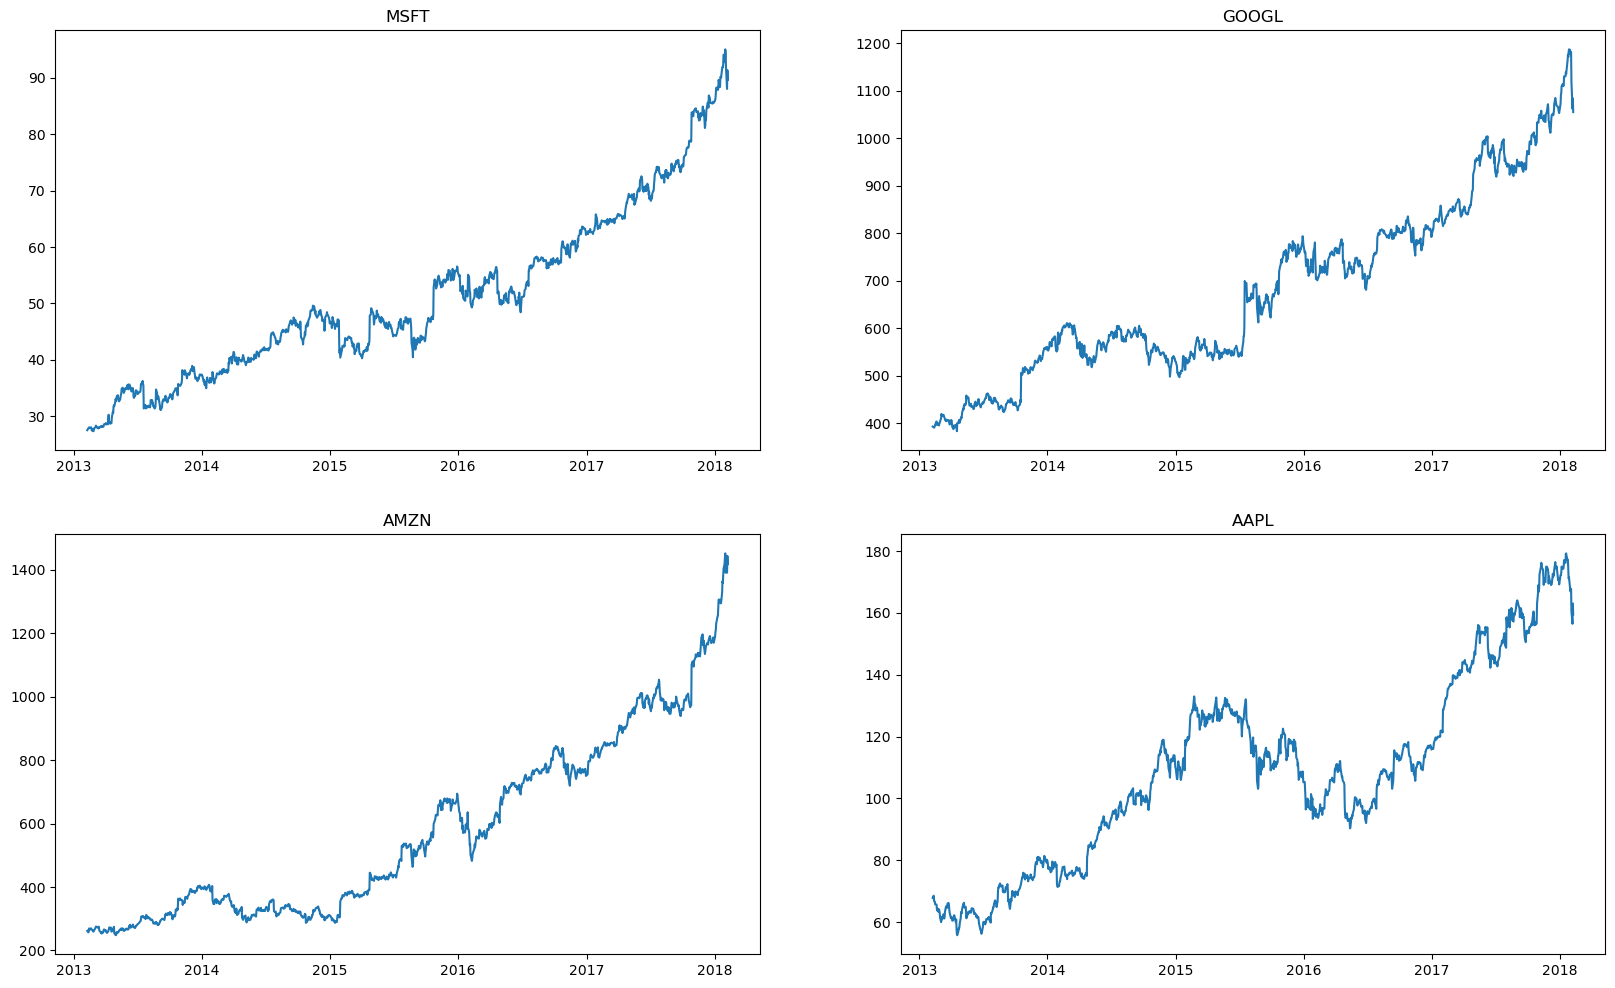

In [18]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_list,1):
    plt.subplot(2,2,index)
    filter1=all_data['Name']== company
    df=all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

# what is the moving avverage of various stock price?

In [20]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,27.3500,27.71,27.310,27.550,33318306,MSFT
1,2013-02-11,27.6500,27.92,27.500,27.860,32247549,MSFT
2,2013-02-12,27.8800,28.00,27.750,27.880,35990829,MSFT
3,2013-02-13,27.9300,28.11,27.880,28.030,41715530,MSFT
4,2013-02-14,27.9200,28.06,27.870,28.040,32663174,MSFT
5,2013-02-15,28.0400,28.16,27.875,28.010,49650538,MSFT
6,2013-02-19,27.8801,28.09,27.800,28.045,38804616,MSFT
7,2013-02-20,28.1300,28.20,27.830,27.870,44109412,MSFT
8,2013-02-21,27.7400,27.74,27.230,27.490,49078338,MSFT
9,2013-02-22,27.6800,27.76,27.480,27.760,31425726,MSFT


In [36]:
all_data['close'].rolling(window=10).mean().head(14)

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9     27.8535
10    27.8355
11    27.7865
12    27.7795
13    27.7565
Name: close, dtype: float64

In [37]:
new_data = all_data.copy()

In [38]:
#### now lets consider different windows of rolling ,ie 10 days ,20 days ,30 days 
ma_day = [10 ,20 , 50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()

In [39]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
5029,2018-01-30,165.525,167.3700,164.7000,166.97,46048185,AAPL,174.263,174.3340,172.9460
5030,2018-01-31,166.870,168.4417,166.5000,167.43,32478930,AAPL,173.096,174.0925,172.8726
5031,2018-02-01,167.165,168.6200,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
5032,2018-02-02,166.000,166.8000,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
5033,2018-02-05,159.100,163.8800,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026
5034,2018-02-06,154.830,163.7200,154.0000,163.03,68243838,AAPL,166.700,171.7520,172.0640
5035,2018-02-07,163.085,163.4000,159.0685,159.54,51608580,AAPL,165.232,171.0125,171.7554


In [40]:
new_data.set_index('date',  inplace=True)

In [41]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,27.350,27.71,27.3100,27.55,33318306,MSFT,NaN,NaN,NaN
2013-02-11,27.650,27.92,27.5000,27.86,32247549,MSFT,NaN,NaN,NaN
2013-02-12,27.880,28.00,27.7500,27.88,35990829,MSFT,NaN,NaN,NaN
2013-02-13,27.930,28.11,27.8800,28.03,41715530,MSFT,NaN,NaN,NaN
2013-02-14,27.920,28.06,27.8700,28.04,32663174,MSFT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,167.165,168.62,166.7600,167.78,47230787,AAPL,171.948,173.8700,172.8252
2018-02-02,166.000,166.80,160.1000,160.50,86593825,AAPL,170.152,173.2435,172.6356
2018-02-05,159.100,163.88,156.0000,156.49,72738522,AAPL,168.101,172.3180,172.3026


In [42]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

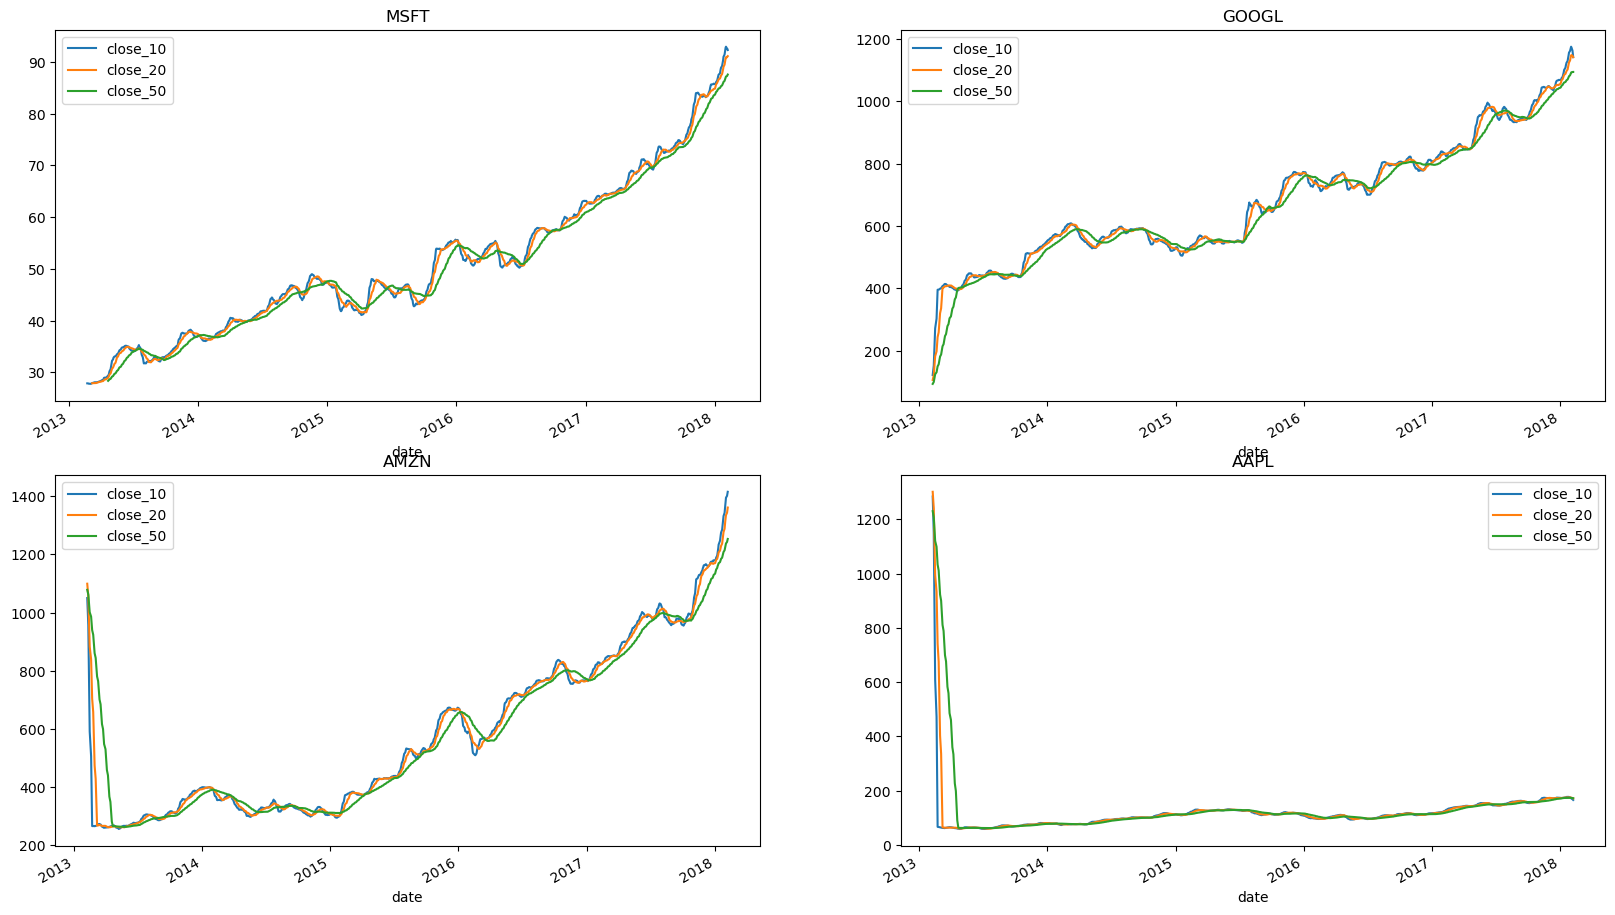

In [28]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list , 1):
    plt.subplot(2 , 2 , index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)

# 4.. analyse Closing price change in apple stock !

Daily Stock Return Formula
   To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company. 

In [45]:
company_list

['C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\GOOGL_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\MSFT_data.csv']

In [47]:
apple = pd.read_csv(r'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAPL_data.csv')

In [49]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [50]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [51]:
apple['Daily return(in %)'] = apple['close'].pct_change() * 100

### pct_change() returns : Percentage change between the current and a prior element.

In [52]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [53]:
import plotly.express as px

In [55]:
px.line(apple , x="date" , y="Daily return(in %)") ## Plotting Line-plot of "date" vs "Daily return(in %)"..

# 5.. Performing resampling analysis of closing price ..

Before doing resampling,first u have to make your date feature 'row-index' so that u can resample data on various basis :

a..yearly('Y')  , 

b..quarterly('Q')   ,

c..monthly('M') ,

d..weekly basis ('W'), 
e..Daily_basis('D')  
f..minutes ('3T') , 
g..30 second bins('30S')   ,
h..resample('17min')

In [56]:
apple.dtypes

date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                  int64
Name                   object
Daily return(in %)    float64
dtype: object

In [57]:
apple['date'] =pd.to_datetime(apple['date'])

In [58]:
apple.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily return(in %)           float64
dtype: object

In [59]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return(in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [60]:
apple.set_index('date' , inplace=True)

In [61]:
apple.head(4)

,open,high,low,close,volume,Name,Daily return(in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [62]:
apple['close'].resample('M').mean() ## resample data on monthly basis ..

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

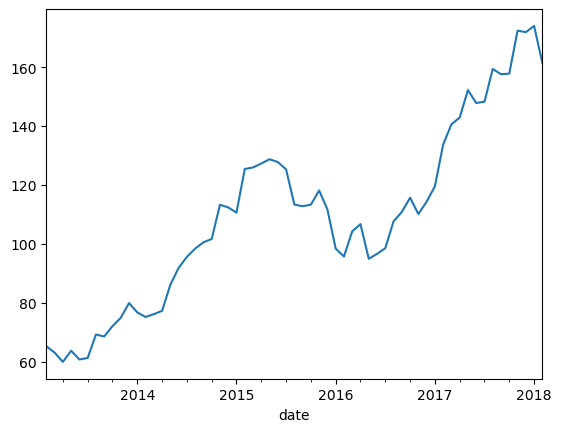

In [63]:
apple['close'].resample('M').mean().plot()

In [64]:
apple['close'].resample('Y').mean() ## resample data on Yearly basis ..

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

In [65]:
apple['close'].resample('Q').mean() ## resample data on Quarterly basis ..

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

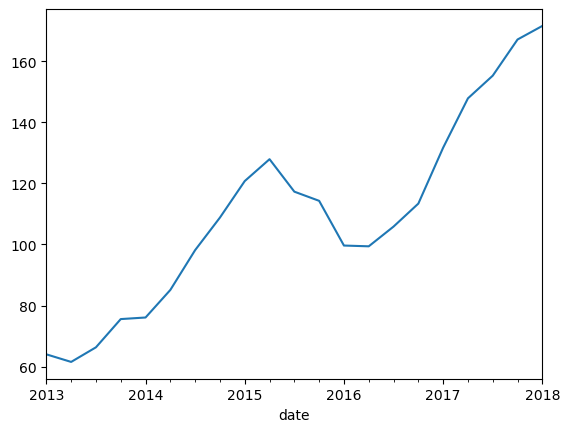

In [66]:
apple['close'].resample('Q').mean().plot()

# 6.. Whether closing prices of these tech companies (Amazon,Apple,Google,Microsoft) are correlated or not !

In [67]:
company_list

['C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\GOOGL_data.csv',
 'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\MSFT_data.csv']

In [68]:
company_list[0]

'C:\\Users\\hp\\Desktop\\portfolio projects\\individual_stocks_5yr\\AAPL_data.csv'

In [69]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [70]:
closing_price = pd.DataFrame()

In [71]:
closing_price['apple_close'] = app['close']
closing_price['amzn_close'] = amzn['close']
closing_price['goog_close'] = google['close']
closing_price['msft_close'] = msft['close']

In [72]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



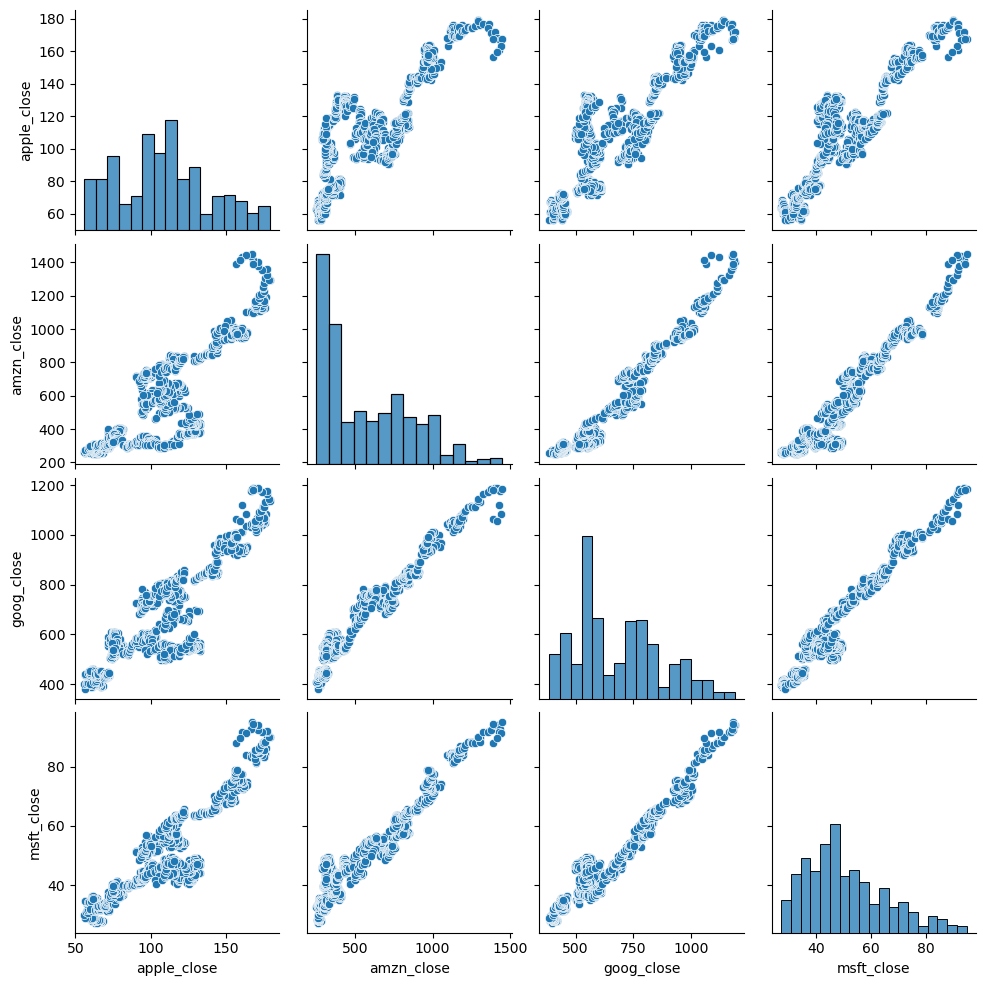

In [73]:
sns.pairplot(closing_price)

In [74]:
closing_price.corr()

,apple_close,amzn_close,goog_close,msft_close
apple_close,1.000000,0.819078,0.843736,0.899689
amzn_close,0.819078,1.000000,0.973988,0.955977
goog_close,0.843736,0.973988,1.000000,0.970779
msft_close,0.899689,0.955977,0.970779,1.000000


#co-relation plot for stock prices#

<Axes: >

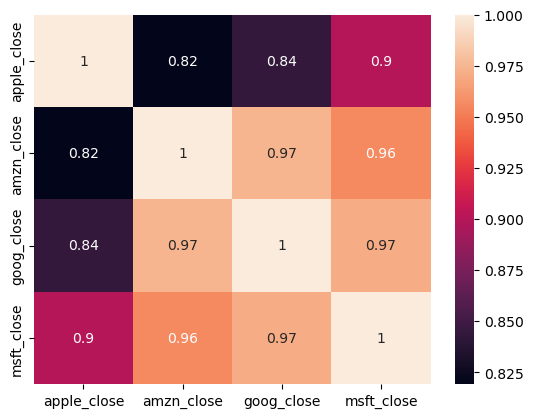

In [75]:
sns.heatmap(closing_price.corr() , annot=True)

'''

Conclusions : 
Closing price of Google and Microsoft are well correlated
& Closing price of Amazon and Microsoft have a co-relation of 0.96


'''

# 7.. analyse Whether Daily change in Closing price of stocks or Daily Returns in Stock are co-related or not !

In [76]:
closing_price

,apple_close,amzn_close,goog_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


In [77]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [78]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [79]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1) * 100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [80]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1) * 100

In [81]:
closing_price

,apple_close,amzn_close,goog_close,msft_close,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
0,67.8542,261.95,393.0777,27.55,NaN,NaN,NaN,NaN
1,68.5614,257.21,391.6012,27.86,1.042235,-1.809506,-0.375625,1.125227
2,66.8428,258.70,390.7403,27.88,-2.506658,0.579293,-0.219841,0.071788
3,66.7156,269.47,391.8214,28.03,-0.190297,4.163123,0.276680,0.538020
4,66.6556,269.24,394.3039,28.04,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26,0.209043,-4.196734,-0.053290,-0.789391
1255,160.5000,1429.95,1119.2000,91.78,-4.339015,2.874101,-5.280173,-2.631021
1256,156.4900,1390.00,1062.3900,88.00,-2.498442,-2.793804,-5.075947,-4.118544
1257,163.0300,1442.84,1084.4300,91.33,4.179181,3.801439,2.074568,3.784091


In [82]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'goog_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [83]:
clsing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'goog_close_pct_change', 'msft_close_pct_change']]

In [84]:
### since we have used Pairplot already , lets use extension of Pairplot , ie Pairgrid :

In [ ]:
'''
Pairplot : we have histogram on diagonals & scatterplot/kde/
            any_other_plot which tells dist.. on rest of the plot 


Pairgrid : Once we create grid , we can set plot as per our need : 

ie , if we have 4 features , it creates total 16 graphs/plots or matrices of 4*4



    There would be various possibilities for type of plots in our Pairgrid which we can set as per our need :

    a) all plots can be scatterplot
    b) on diagonal , we have histogram & rest will be scatterplot
    c) on diagonal , we have histogram & rest will be kdeplot 
    c) on diagonal , we have histogram & below diagonal will be kdeplot
            & upper diagonal will be scatterplot 

Note :: kdeplot for 2 features also known as contour plots which returns density
but kdeplot returns distribution if we are performing univariate analysis else it will show density ..

'''

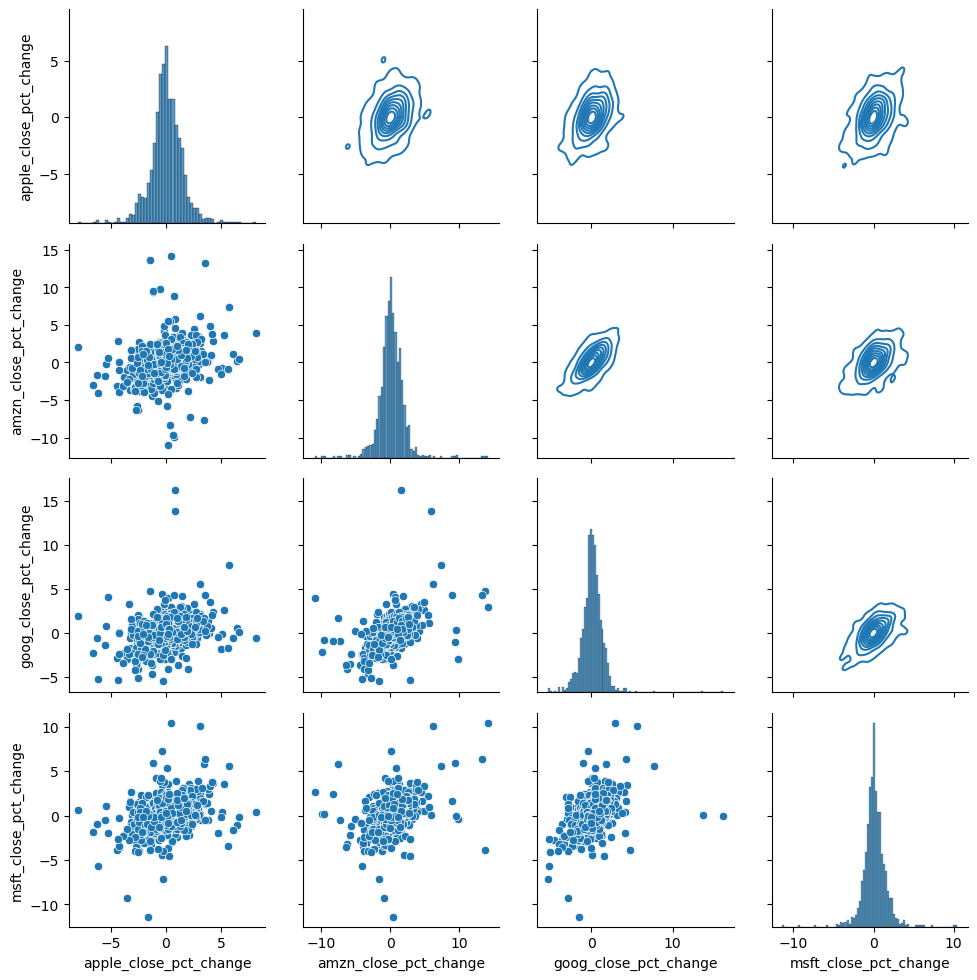

In [85]:
g = sns.PairGrid(data= clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [ ]:
'''

Conclusion :
While Comparing 'AAPL_close_pct_change' to 'AMZN_close_pct_change'  , it shows a linear relationship upto some extent..


'''

In [86]:
clsing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,goog_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.348858,0.366598
amzn_close_pct_change,0.287659,1.000000,0.548423,0.402678
goog_close_pct_change,0.348858,0.548423,1.000000,0.488373
msft_close_pct_change,0.366598,0.402678,0.488373,1.000000
